In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import timeit

# Linear regression prototyping

## Content:
1. Implementing OLS
2. Visualizing OLS
3. Evalutating OLS

## Implementing OLS

TODO: Write a short summary of why this works.

Links:
* [OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares)
* [Moment Matrices](https://en.wikipedia.org/wiki/Moment_matrix)
* [Gauss-Markov Theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem)

### Implementation

#### Training:

We are given n datapoints which each have k features and one label.

The output is a list of the coefficients of the model, where the last entry is the bias.

Input:

1. Datapoints as Matrix:
X = \[x_1, x_2, ..., x_n\],
where x_i = \[x_i_1, x_i_2, ..., x_i_k\]

2. Labels:
Y = \[y_1, y_2, ..., y_n\]

Output:

Coefficients:
b = \[b_1, ..., b_k, b_0\]

In [2]:
def train(X, Y):
    X_augmented = np.ones((X.shape[0], X.shape[1] + 1))
    X_augmented[:,:-1] = X
    X = X_augmented
    xtx = np.dot(X.T, X)
    xty = np.dot(X.T, Y)
    return np.dot(np.linalg.inv(xtx), xty)

We will use the [Diabetes Dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset)

In [3]:
# Get the data
full_data_X, full_data_Y = datasets.load_diabetes(return_X_y=True)

# Split data into train and test
train_data_size = 50
X_train = full_data_X[:train_data_size]
Y_train = full_data_Y[:train_data_size]

# For visualization, we only use one feature
X_train = X_train[:, np.newaxis, 2]

coefficients = train(X_train, Y_train)
print(f"Coefficients: Bias b_0 = {coefficients[1]:.2f}, Slope b_1 = {coefficients[0]:.2f}")
print(f"Estimation function f(x) = {coefficients[0]:.2f} * x + {coefficients[1]:.2f}")

Coefficients: Bias b_0 = 146.86, Slope b_1 = 919.66
Estimation function f(x) = 919.66 * x + 146.86


#### Predictions:

We are given a set of n datapoints with k features each.

The output is a set of n labels, one for each datapoint.

Input: 

1. Input datapoints X
2. Coefficients, obtained by training

Output:

Array of scalar values, representing the label prediction

In [4]:
def predict(X, coeff):
    return np.dot(X, coeff[:-1]) + coeff[-1]

## Visualizing OLS

First, the training data and the corresponding model:

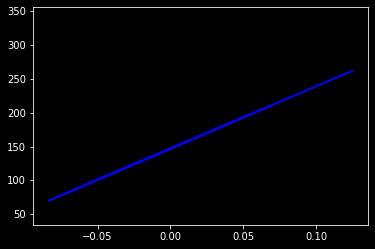

In [5]:
coefficients = train(X_train, Y_train)
model = [predict(x, coefficients) for x in X_train]

plt.scatter(X_train, Y_train, color="black")
plt.plot(X_train, model, color="blue")
plt.show()

Let's compare this result to the sklearn LinearRegression model:

Coefficients of our model:
Bias b_0 = 146.86
Slope b_1 = 919.66

Coefficients the sklearn model:
Bias b_0 = 146.86
Slope b_1 = 919.66



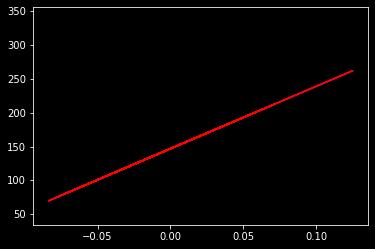

In [6]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
sk_model = regr.predict(X_train)

print("Coefficients of our model:")
print(f"Bias b_0 = {coefficients[1]:.2f}")
print(f"Slope b_1 = {coefficients[0]:.2f}")
print("")
print("Coefficients the sklearn model:")
print(f"Bias b_0 = {regr.intercept_:.2f}")
print(f"Slope b_1 = {regr.coef_[0]:.2f}")
print("")

plt.scatter(X_train, Y_train, color="black")
plt.plot(X_train, model, color="blue")
plt.plot(X_train, sk_model, color="red")
plt.show()


Yay, the models are identical!

Next, let's see how well our model does with test data

Mean squared error:
3947.350333068296



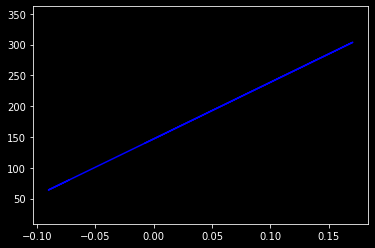

In [7]:
X_test = full_data_X[train_data_size:]
Y_test = full_data_Y[train_data_size:]

# For visualization, we only use one feature
X_test = X_test[:, np.newaxis, 2]
model = [predict(x, coefficients) for x in X_test]

print("Mean squared error:")
print(f"{mean_squared_error(Y_test, model)}")
print("")

plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, model, color="blue")
plt.show()

## Evaluating OLS

Let's see how our OLS implemetation compares against the sklearn one

### Training speed

In [8]:
%timeit coeff = train(full_data_X, full_data_Y)

112 µs ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%timeit regr.fit(full_data_X, full_data_Y)

454 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


We can see, our implementation is almost twice as fast

### Prediction speed

In [10]:
coeff = train(full_data_X, full_data_Y)
%timeit predict(full_data_X, coeff)

7.28 µs ± 286 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
%timeit regr.predict(full_data_X)

57.2 µs ± 3.62 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


For testing, our model is even faster than the sklearn model